<a href="https://colab.research.google.com/github/iqbalmuhammad1/RPL-Desain-Implementasi/blob/main/Clustering_1301194032_MUHAMMAD_IQBAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # untuk melakukan proses aritmatika
import pandas as pd # untuk membantu dalam memproses dataframe
import matplotlib.pyplot as plt # untuk membuat grafik statistik
import seaborn as sns # untuk membuat grafik statistik
from sklearn.preprocessing import MinMaxScaler # untuk melakukan preprocessing minmax scaller
from matplotlib import style
from copy import deepcopy
import copy
import random
import math
from scipy import stats
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics

## **Olah Data**

In [ ]:
# melakukan read data yang disimpan pada google drive
df_kendaraan_test = pd.read_csv("kendaraan_test.csv")
df_kendaraan_train = pd.read_csv("kendaraan_train.csv")

cek Dataset kendaraan_train

In [ ]:
# import dataframe
df_data = df_kendaraan_train
df_data

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


## **Eksplorasi Data**


Menghitung jumlah data

In [ ]:
# menghitung banyak jumlah data
df_data.shape

(285831, 12)

Melihat tipe dataset

In [ ]:
# melihat tipe data
df_data.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

Melihat statistik data

In [ ]:
df_data.describe

<bound method NDFrame.describe of             id Jenis_Kelamin  ...  Lama_Berlangganan  Tertarik
0            1        Wanita  ...               97.0         0
1            2          Pria  ...              158.0         0
2            3           NaN  ...              119.0         0
3            4        Wanita  ...               63.0         0
4            5          Pria  ...              194.0         0
...        ...           ...  ...                ...       ...
285826  285827        Wanita  ...              217.0         0
285827  285828        Wanita  ...               50.0         0
285828  285829        Wanita  ...              226.0         0
285829  285830          Pria  ...              270.0         0
285830  285831          Pria  ...               44.0         0

[285831 rows x 12 columns]>

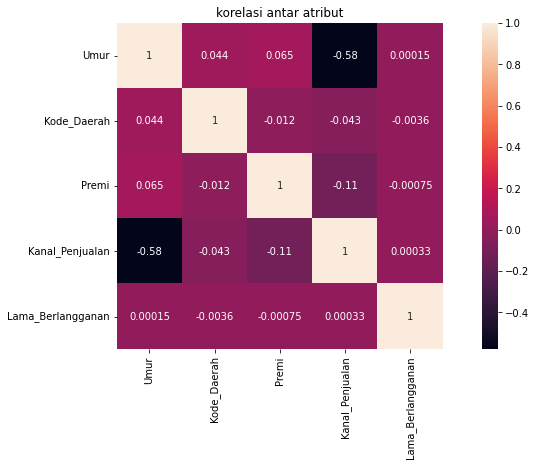

In [ ]:
# menampilkan Heatmap
corrmat = df_kendaraan_train.corr()
f, ax = plt.subplots(figsize=(14, 6))
plt.title('korelasi antar atribut')
sns.heatmap(corrmat, annot=True, square=True)

Pengecekan nilai null dataset

In [ ]:
# pengecekan nilai null pada dataset
df_data.isnull()
df_data.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

Menghapus data null 

In [ ]:
# drop unuse values / null values
df_data = df_kendaraan_train
df_data.drop('Jenis_Kelamin',axis='columns', inplace=True)
df_data.drop('id',axis='columns', inplace=True)
df_data.drop('SIM',axis='columns', inplace=True)
df_data.drop('Sudah_Asuransi',axis='columns', inplace=True)
df_data.drop('Umur_Kendaraan',axis='columns', inplace=True)
df_data.drop('Kendaraan_Rusak',axis='columns', inplace=True)
df_data.drop('Tertarik',axis='columns', inplace=True)
df_data

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,33.0,28029.0,152.0,97.0
1,48.0,39.0,25800.0,29.0,158.0
2,21.0,46.0,32733.0,160.0,119.0
3,58.0,48.0,2630.0,124.0,63.0
4,50.0,35.0,34857.0,88.0,194.0
...,...,...,...,...,...
285826,23.0,4.0,25988.0,152.0,217.0
285827,21.0,46.0,44686.0,152.0,50.0
285828,23.0,50.0,49751.0,152.0,226.0
285829,68.0,7.0,30503.0,124.0,270.0


cek kembali hasil dataset yang dihapus

In [ ]:
df_data.isnull().sum()

Umur                 14214
Kode_Daerah          14306
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [ ]:
# mengambil kolom dengan korelasi yang terbesar
df_data = df_data[['Umur','Premi','Kanal_Penjualan']]
df_data

,Umur,Premi,Kanal_Penjualan
0,30.0,28029.0,152.0
1,48.0,25800.0,29.0
2,21.0,32733.0,160.0
3,58.0,2630.0,124.0
4,50.0,34857.0,88.0
...,...,...,...
285826,23.0,25988.0,152.0
285827,21.0,44686.0,152.0
285828,23.0,49751.0,152.0
285829,68.0,30503.0,124.0


Penyebaran dataset

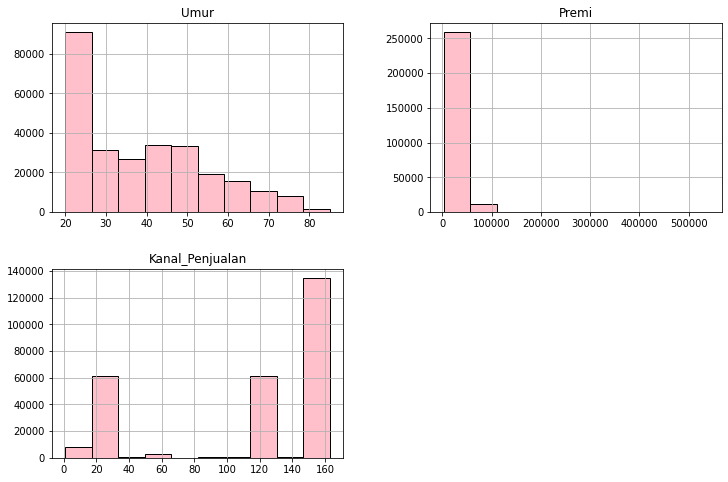

In [ ]:
df_data.hist(figsize=(12, 8), color="pink", edgecolor = "black")
plt.show()

Pengecekan outlier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


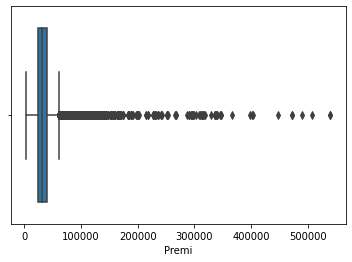

In [ ]:
# mengecek outlier
sns.boxplot(df_data['Premi'])
plt.show()

In [ ]:
# Function for handling outlier data
def handling_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    LB=q1 - (IQR * 1.5)
    UB=q3 + (IQR *1.5)
    dff = df[((df>LB) & (df<UB))]
    return dff

In [ ]:
# menghapus outlier dari kolom premi
df_new = df_data
df_new['Premi'] = handling_outlier(df_new['Premi'])
df_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Umur,Premi,Kanal_Penjualan
0,30.0,28029.0,152.0
1,48.0,25800.0,29.0
2,21.0,32733.0,160.0
3,58.0,2630.0,124.0
4,50.0,34857.0,88.0
...,...,...,...
285826,23.0,25988.0,152.0
285827,21.0,44686.0,152.0
285828,23.0,49751.0,152.0
285829,68.0,30503.0,124.0


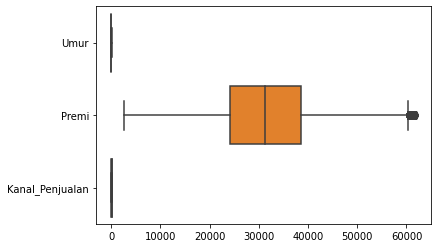

In [ ]:
# mengecek kembali outlier dari kolom premi
sns.boxplot(data= df_data, orient="h")


In [ ]:
# penghapusan null value
df_data = df_data.dropna(how='any')
print(df_data.shape)
print(df_data.isnull().sum())

(238175, 3)
Umur               0
Premi              0
Kanal_Penjualan    0
dtype: int64


In [ ]:
# Min Max Scaller Normalization
Scaller = MinMaxScaler()
Scaller.fit(df_data)
df_new = Scaller.transform(df_data)
df_Scale = pd.DataFrame(df_data, columns=['Umur', 'Premi', 'Kanal_Penjualan'])
df_Scale

,Umur,Premi,Kanal_Penjualan
0,30.0,28029.0,152.0
1,48.0,25800.0,29.0
2,21.0,32733.0,160.0
3,58.0,2630.0,124.0
4,50.0,34857.0,88.0
...,...,...,...
285826,23.0,25988.0,152.0
285827,21.0,44686.0,152.0
285828,23.0,49751.0,152.0
285829,68.0,30503.0,124.0


## **KMeans**

In [ ]:
# PCA untuk merubah data menjadi 2 dimensi
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
principal = pca.fit_transform(df_data)
df_data_pca = pd.DataFrame(data=principal, columns=['pca1','pca2'])
df_data_pca

,pca1,pca2
0,-1218.675171,-39.898409
1,-3447.626471,85.233977
2,3485.320918,-51.162186
3,-26617.660979,2.408175
4,5609.350098,23.924364
...,...,...
238170,-3259.675369,-40.306297
238171,15438.323104,-47.944081
238172,20503.322820,-49.575838
238173,1255.337402,-6.744539


In [ ]:
# data tanpa pca
df_dtnonpca = df_data[['Premi', 'Kanal_Penjualan']]

In [ ]:
# Rumus euclidean

def euclidean(data, centro):
  x = 0
  for i in range(len(centro)):
    x = x + ((data[i] - centro[i]) * (data[i] - centro[i]))
  return math.sqrt(x)

In [ ]:
# fungsi mencari cluster

def cluster(dt, cen, k) :
  tempclust = [] # jarak antar cluster
  cluster = []
  for i in range(len(dt)):
    tempclust = [euclidean(cen[p], dt[i]) for p in range(k)]

    m = min(tempclust)
    indexx = tempclust.index(m)
    cluster.append([data[i][0], data[i][1], indexx])

    tempclust = []
  return cluster


In [ ]:
# fungsi mengembalikan nilai centroid

def centroid(A, k):
  cenBaru = []
  cenA = []
  cenB = []

  for i in range(k):
      cenA = [x[0] for x in A if x[2] == i]
      cenB = [x[1] for x in A if x[2] == i]
      cenBaru.append([sum(cenA)/len(cenA), sum(cenB)/len(cenB)])
      
  return cenBaru

In [ ]:
def kmeans(data, k):
  cent = [data[np.random.randint(0, len(data))] for x in range(k)]
  cenBaru2 = []

  while True:
      clus = cluster(data, cent, k)

      cenBaru2 = centroid(clus, k)
      print(cenBaru2)

      if cent == cenBaru2:
        print("DONE!!!")
        break
      cent = cenBaru2
  return clus, cent

In [ ]:
# main program

k = 3
data = df_data_pca.to_numpy().tolist()
clus, cent = kmeans(data, k)

[[-15825.973303195127, -1.0086937946545642], [12083.232091512284, 3.6935571837529615], [850.9038912110764, -6.515655760034516]]
[[-23962.963092404483, 5.649099264902437], [14430.19212541631, 5.708525099947638], [239.06570924642938, -6.8250643092830865]]
[[-26308.85965933106, 8.767504377207736], [15102.464652945684, 6.382275054997979], [81.10988672496966, -6.95959127917023]]
[[-26472.90989147453, 9.10233461509198], [15301.195960882576, 6.527835765821087], [142.07151120042107, -6.893319407550865]]
[[-26476.381182923826, 9.113902819403359], [15401.918758893464, 6.602510374294682], [197.22608040728286, -6.837710668564556]]
[[-26474.173379254167, 9.106727319128643], [15462.873215162104, 6.656717569603652], [231.84655874468086, -6.806422563484262]]
[[-26472.90989147453, 9.10233461509198], [15502.206367829505, 6.674935551156439], [254.05766311956265, -6.776973353847934]]
[[-26472.27753920438, 9.100258550080474], [15524.610290721985, 6.687958648141374], [266.64815566991905, -6.761869301965537]

In [ ]:
#visualisasi clustering
def visualisasi(clus, cent, k):
  plt.subplots(figsize=(14,6))
  
  for i in range(k):
      plt.scatter([j[0] for j in clus if j[2] == i], 
                  [j[1] for j in clus if j[2] == i])
  
  for i in range(k):
      plt.scatter([j[0] for j in cent], 
                  [j[1] for j in cent], s=100, color='black')


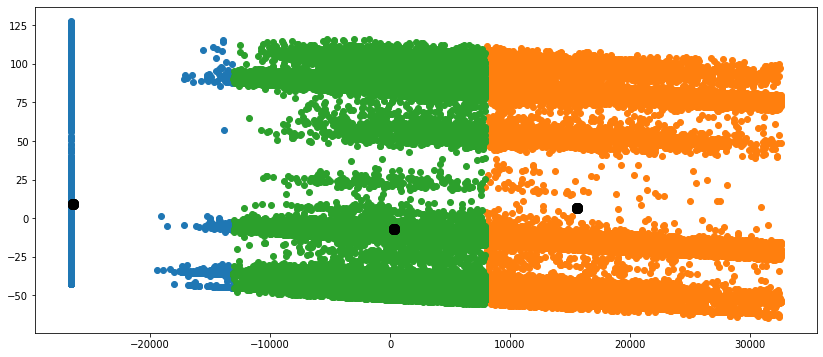

In [ ]:
# pemanggilan fungsi
visualisasi(clus, cent, k)

## **Evaluasi**

In [ ]:
distortions = []
mapping = {}
K = range(1, 11)

for k in K :
  model = KMeans(n_clusters=k).fit(df_dtnonpca)
  model.fit(df_dtnonpca)

  distortions.append(sum(np.min(cdist(df_dtnonpca, model.cluster_centers_,'euclidean'),axis=1)) / df_dtnonpca.shape[0])
  
  mapping[k] = sum(np.min(cdist(df_dtnonpca, model.cluster_centers_,'euclidean'), axis=1)) / df_dtnonpca.shape[0]


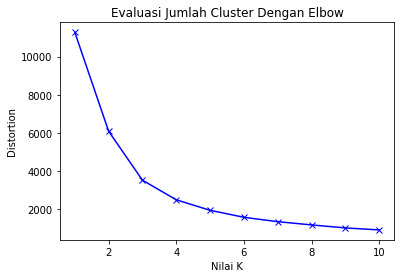

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('Distortion')
plt.title('Evaluasi Jumlah Cluster Dengan Elbow')
plt.show()

## **Eksperimen**

In [ ]:
k = 3
data = df_dtnonpca.to_numpy().tolist()
clus, cent = kmeans(data, k)

[[25861.731319222617, 123.3788398961101], [39587.99891828409, 106.47887563357646], [2630.536484900735, 113.89649639581387]]
[[27343.402177276745, 121.51319628647215], [41404.375236312764, 104.2779510738052], [2667.55645180536, 113.98355726320311]]
[[28201.99370498443, 120.43912270981794], [42633.294196087, 102.79346376653186], [2695.000190480726, 114.04262006238244]]
[[28722.212442599786, 119.79211409395973], [43440.03859894752, 101.82591850528654], [2719.9557303424185, 114.07931944015398]]
[[29044.00550373528, 119.41397881230743], [43965.552800557016, 101.16285006962711], [2741.6327513403235, 114.11436637092565]]
[[29235.101029876285, 119.19924651224007], [44289.186489646185, 100.73981751481516], [2752.7887888125147, 114.12588291064233]]
[[29351.73462691404, 119.07023414080855], [44488.91063771113, 100.46912099276112], [2762.1616058739933, 114.1444339175746]]
[[29420.639248028525, 118.97818126335062], [44608.25224405203, 100.33489238352635], [2767.813059330461, 114.15426866802406]]
[[

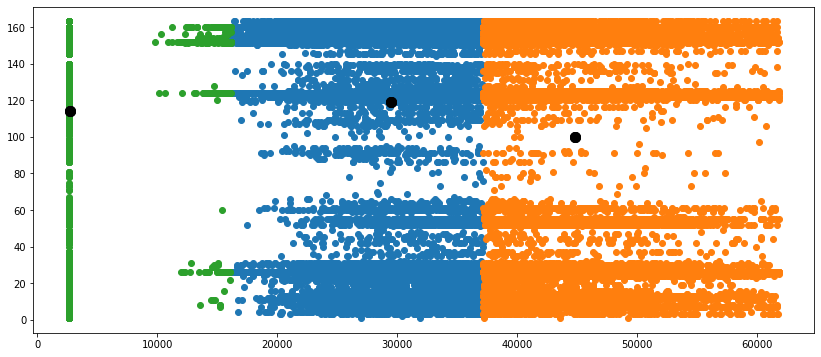

In [ ]:
visualisasi(clus, cent, k)